In [1]:
import pandas as pd

# Load the diabetes_data.csv
diabetes_data = pd.read_csv('Resources/diabetes_data.csv')
diabetes_data.head()


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Load the hypertension_data.csv
hypertension_data = pd.read_csv('Resources/hypertension_data.csv')
hypertension_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Load the stroke_data.csv
stroke_data = pd.read_csv('Resources/stroke_data.csv')
stroke_data.head()


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


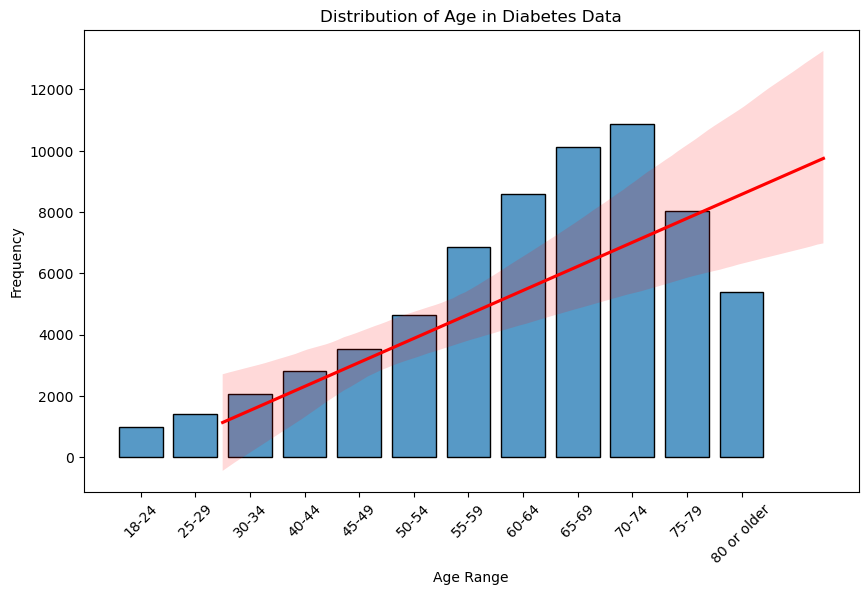

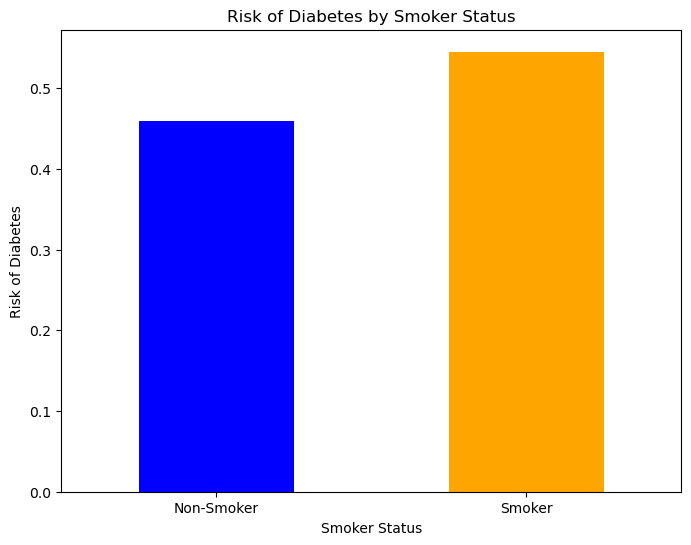

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
diabetes_data = pd.read_csv('Resources/diabetes_data.csv')
hypertension_data = pd.read_csv('Resources/hypertension_data.csv')
stroke_data = pd.read_csv('Resources/stroke_data.csv')

# Define age ranges
age_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
age_labels = ['18-24', '25-29', '30-34', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Categorize ages into bins
diabetes_data['AgeRange'] = pd.cut(diabetes_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the midpoints of the age ranges
age_midpoints = [np.mean([age_bins[i], age_bins[i+1]]) for i in range(len(age_bins)-1)]

# Get the frequency of each age range
age_range_counts = diabetes_data['AgeRange'].value_counts().sort_index()

# Create a DataFrame with the midpoints and counts
trendline_data = pd.DataFrame({'AgeMidpoint': age_midpoints, 'Frequency': age_range_counts})

# Histogram of Age for Diabetes Data with age ranges and trendline
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['AgeRange'], kde=False, bins=len(age_labels), shrink=0.8)

# Plot the trendline
sns.regplot(x='AgeMidpoint', y='Frequency', data=trendline_data, scatter=False, color='red')

plt.title('Distribution of Age in Diabetes Data')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Analyze smoker status and diabetes risk
# Assuming there is a column 'Smoker' in the dataset with values 0 (No) and 1 (Yes)

# Group by smoker status and calculate the prevalence of diabetes
smoker_counts = diabetes_data['Smoker'].value_counts()
diabetes_smoker_counts = diabetes_data[diabetes_data['Diabetes'] == 1]['Smoker'].value_counts()

# Calculate the risk (prevalence) of diabetes for smokers and non-smokers
diabetes_risk = diabetes_smoker_counts / smoker_counts

# Create a bar plot for diabetes risk by smoker status
plt.figure(figsize=(8, 6))
diabetes_risk.plot(kind='bar', color=['blue', 'orange'])
plt.title('Risk of Diabetes by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Risk of Diabetes')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'], rotation=0)
plt.show()


In [5]:
import numpy as np

# Check for missing values
missing_values = stroke_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for infinite values
infinite_values = stroke_data.isin([np.inf, -np.inf]).sum()
print("Infinite values in each column:\n", infinite_values)


Missing values in each column:
 sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Infinite values in each column:
 sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


                sex           age  hypertension  heart_disease  ever_married  \
count  40907.000000  40910.000000  40910.000000   40910.000000  40910.000000   
mean       0.555162     51.327255      0.213835       0.127719      0.821340   
std        0.496954     21.623969      0.410017       0.333781      0.383072   
min        0.000000     -9.000000      0.000000       0.000000      0.000000   
25%        0.000000     35.000000      0.000000       0.000000      1.000000   
50%        1.000000     52.000000      0.000000       0.000000      1.000000   
75%        1.000000     68.000000      0.000000       0.000000      1.000000   
max        1.000000    103.000000      1.000000       1.000000      1.000000   

          work_type  Residence_type  avg_glucose_level           bmi  \
count  40910.000000    40910.000000       40910.000000  40910.000000   
mean       3.461134        0.514886         122.075901     30.406355   
std        0.780919        0.499784          57.561531      6.8

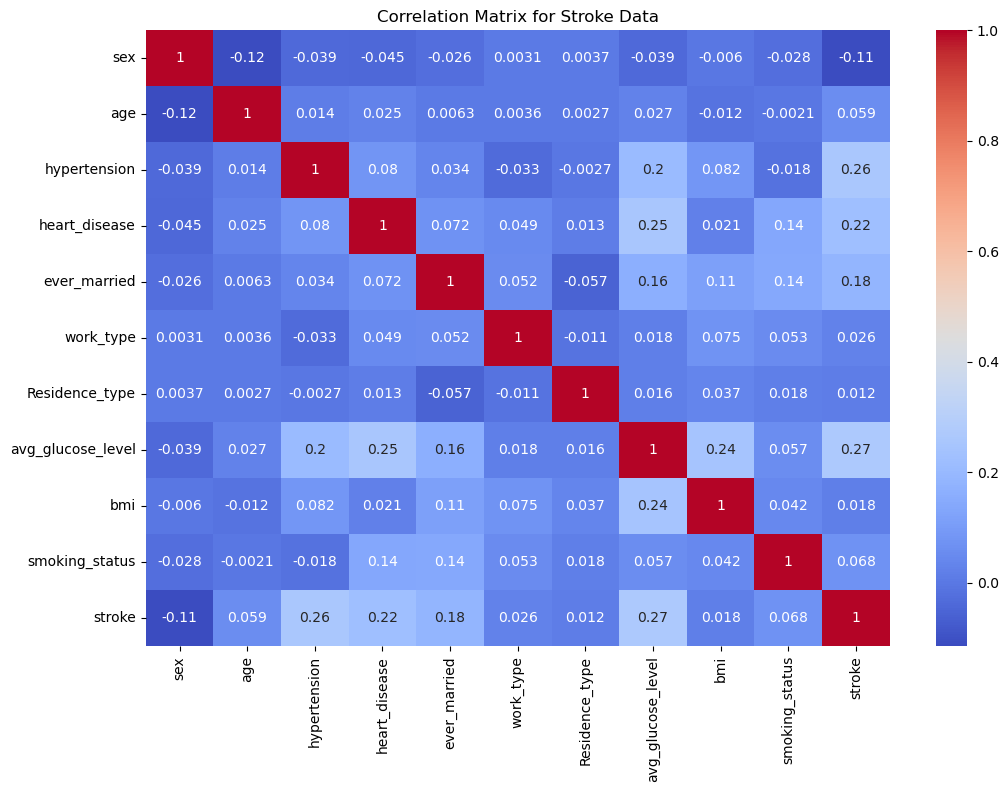

Optimization terminated successfully.
         Current function value: 0.603184
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                40910
Model:                          Logit   Df Residuals:                    40900
Method:                           MLE   Df Model:                            9
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.1298
Time:                        18:03:12   Log-Likelihood:                -24676.
converged:                       True   LL-Null:                       -28357.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8887      0.077    -24.611      0.000      -2.039      -1.738
age     

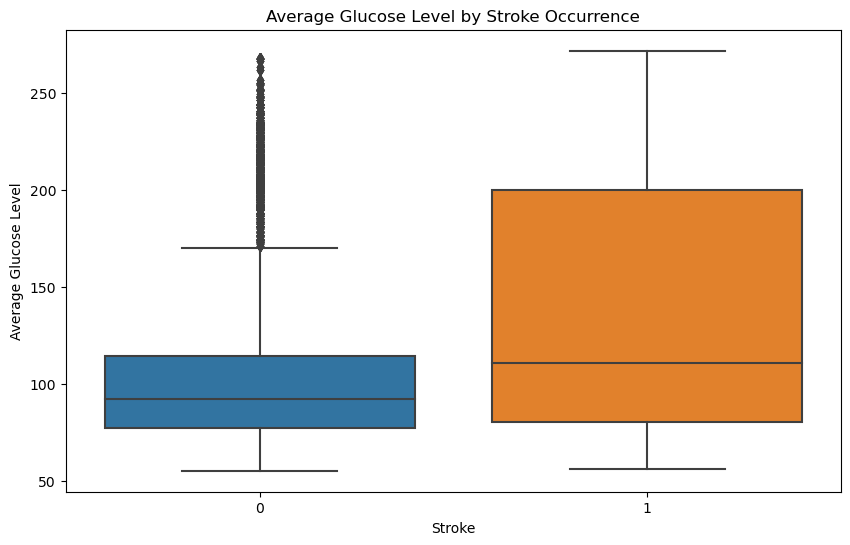

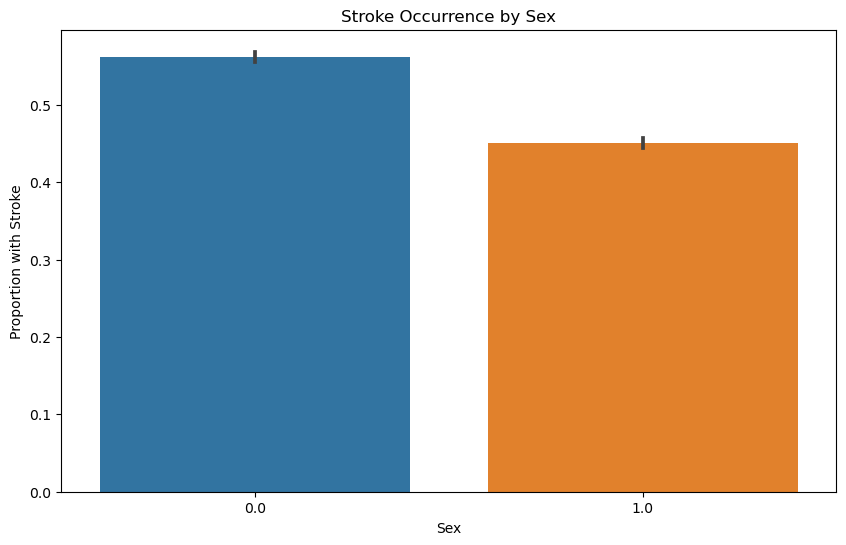

Chi-square test for stroke occurrence by smoking_status:
Chi2: 190.94998576372979
p-value: 1.972297048410639e-43


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency


# Summary statistics
print(stroke_data.describe())

# Correlation matrix and heatmap
corr_matrix = stroke_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Stroke Data')
plt.show()

# Logistic Regression
X = stroke_data[['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = stroke_data['stroke']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# Box plot for avg_glucose_level by stroke occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_data)
plt.title('Average Glucose Level by Stroke Occurrence')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

# Bar plot for stroke occurrence by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='stroke', data=stroke_data)
plt.title('Stroke Occurrence by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion with Stroke')
plt.show()

# Chi-square test for stroke occurrence by smoking_status
contingency_table = pd.crosstab(stroke_data['smoking_status'], stroke_data['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square test for stroke occurrence by smoking_status:')
print('Chi2:', chi2)
print('p-value:', p)


In [7]:
import pandas as pd
from scipy.stats import chi2_contingency
from tabulate import tabulate

# Assuming you have already computed contingency_table, chi2, p, dof, and expected

# Create a DataFrame for the results
results_data = [
    ["Chi2", chi2],
    ["p-value", p],
    ["Degrees of Freedom", dof],
    ["Expected Values", expected]
]

# Print the contingency table
print("Contingency Table:")
print(tabulate(contingency_table, headers="keys", tablefmt="grid"))

# Print the results in a formatted table
print("\nResults of Chi-square test for stroke occurrence by smoking_status:")
print(tabulate(results_data, headers=["Test Statistic", "Value"], tablefmt="grid"))


Contingency Table:
+------------------+-------+-------+
|   smoking_status |     0 |     1 |
+==================+=======+=======+
|                0 | 11157 |  9764 |
+------------------+-------+-------+
|                1 |  9293 | 10696 |
+------------------+-------+-------+

Results of Chi-square test for stroke occurrence by smoking_status:
+--------------------+-----------------------------------+
| Test Statistic     | Value                             |
+====================+===================================+
| Chi2               | 190.94998576372979                |
+--------------------+-----------------------------------+
| p-value            | 1.972297048410639e-43             |
+--------------------+-----------------------------------+
| Degrees of Freedom | 1                                 |
+--------------------+-----------------------------------+
| Expected Values    | [[10457.94304571 10463.05695429]  |
|                    |  [ 9992.05695429  9996.94304571]] |
+---

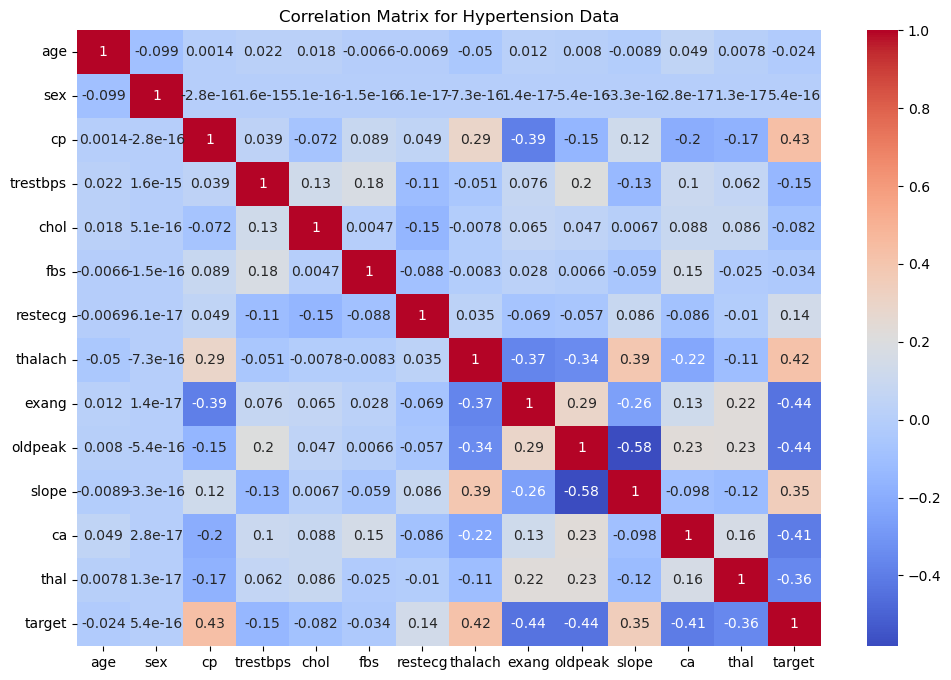

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = hypertension_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Hypertension Data')
plt.show()


In [9]:
import numpy as np

# Check for missing values
missing_values = hypertension_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for infinite values
infinite_values = hypertension_data.isin([np.inf, -np.inf]).sum()
print("Infinite values in each column:\n", infinite_values)


Missing values in each column:
 age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64
Infinite values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
import statsmodels.api as sm

# Drop the 'sex' column
hypertension_data_cleaned = hypertension_data.drop(columns=['sex'])

# Define your independent variables (X) and dependent variable (y)
X = hypertension_data_cleaned[['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = hypertension_data_cleaned['target']
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.373063
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                26083
Model:                          Logit   Df Residuals:                    26070
Method:                           MLE   Df Model:                           12
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.4583
Time:                        18:03:15   Log-Likelihood:                -9730.6
converged:                       True   LL-Null:                       -17963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0654      0.220      9.377      0.000       1.634       2.497
age            0.0005      0.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
diabetes_data = pd.read_csv('Resources/diabetes_data.csv')

# Prepare the data
X = diabetes_data.drop('Diabetes', axis=1)  # Features
y = diabetes_data['Diabetes']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7685 2916]
 [2416 8191]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load the data
hypertension_data = pd.read_csv('Resources/hypertension_data.csv')

# Handle missing values (impute with mean)
hypertension_data.fillna(hypertension_data.mean(), inplace=True)

# Prepare the data
X = hypertension_data.drop('target', axis=1)  # Features
y = hypertension_data['target']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2734  799]
 [ 362 3930]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      3533
           1       0.83      0.92      0.87      4292

    accuracy                           0.85      7825
   macro avg       0.86      0.84      0.85      7825
weighted avg       0.85      0.85      0.85      7825



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load the data
stroke_data = pd.read_csv('Resources/stroke_data.csv')

# Handle missing values (impute with mean)
stroke_data.fillna(stroke_data.mean(), inplace=True)

# Prepare the data
X = stroke_data.drop('stroke', axis=1)  # Features
y = stroke_data['stroke']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4591 1541]
 [2384 3757]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      6132
           1       0.71      0.61      0.66      6141

    accuracy                           0.68     12273
   macro avg       0.68      0.68      0.68     12273
weighted avg       0.68      0.68      0.68     12273



In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Example: Interaction term
diabetes_data['Age_BMI'] = diabetes_data['Age'] * diabetes_data['BMI']


In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features
selector = SelectKBest(f_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator
best_logreg = grid_search.best_estimator_


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6100   32]
 [   0 6141]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6132
           1       0.99      1.00      1.00      6141

    accuracy                           1.00     12273
   macro avg       1.00      1.00      1.00     12273
weighted avg       1.00      1.00      1.00     12273



In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_logreg, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean()}")


Cross-validated accuracy: 0.6706917624052798


In [20]:
from sklearn.ensemble import VotingClassifier

# Combine models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_logreg),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6117   15]
 [2386 3755]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      6132
           1       1.00      0.61      0.76      6141

    accuracy                           0.80     12273
   macro avg       0.86      0.80      0.80     12273
weighted avg       0.86      0.80      0.80     12273

